# Pre-class Assignment 2 - Predicting House Prices


### [Problem 1] Feature selection for practice

After reading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice, respectively.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


### [Problem 2] Estimation and evaluation by linear regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Convert to numpy ndarray
X = df[['GrLivArea', 'YearBuilt']].values
y = df['SalePrice'].values

In [7]:
X[:, 1]

array([2003, 1976, 2001, ..., 1941, 1950, 1965], dtype=int64)

In [8]:
# Get the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 2) (365, 2) (1095,) (365,)


In [9]:
reg = LinearRegression().fit(X_train, y_train)
reg_predict = reg.predict(X_test)
pd.DataFrame([reg_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,233771.790581,270963.393681,79266.009209,185760.837517,108134.679098,342810.160404,116138.40476,120101.860122,151793.470023,198859.389258,...,100280.498113,109244.102691,39676.537745,283488.944355,228078.358456,268795.542783,229696.984339,117747.886008,214779.052082,150268.119419
1,207500.000000,313000.000000,100000.000000,151000.000000,119000.000000,582933.000000,130000.00000,135000.000000,135500.000000,200141.000000,...,112000.000000,114500.000000,68500.000000,248000.000000,180000.000000,253293.000000,325000.000000,129000.000000,236500.000000,140000.000000


In [10]:
# Use mean squared error for evaluation
mean_squared_error(y_test, reg_predict)

1917649983.459369

In [11]:
def plot_graph(xlabel, ylabel, X, y_true, y_pred):
    plt.title('Visualization between ' + xlabel + ' and ' + ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(X, y_true, label='true value')
    plt.scatter(X, y_pred, label='predicted value')
    plt.legend()
    plt.show()

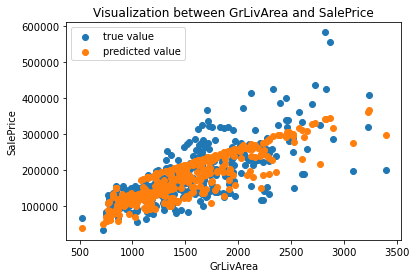

In [12]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, reg_predict)

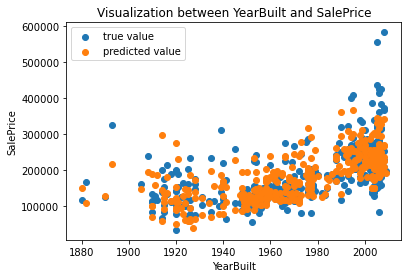

In [13]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, reg_predict)

### [Problem 3] Comparison of methods

In [14]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

SVR

In [15]:
svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
print(mean_squared_error(y_test, reg_predict))

1917649983.459369


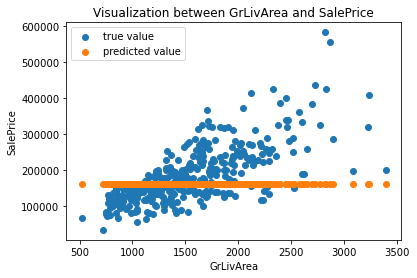

In [16]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, svr_predict)

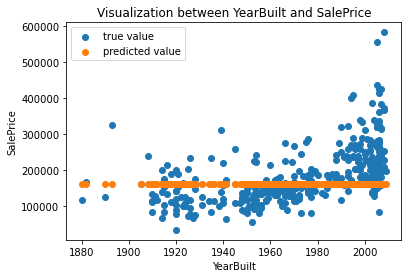

In [17]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, svr_predict)

Decision Tree Regressor

In [18]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_predict = dtr.predict(X_test)
print(mean_squared_error(y_test, dtr_predict))

2752742630.782496


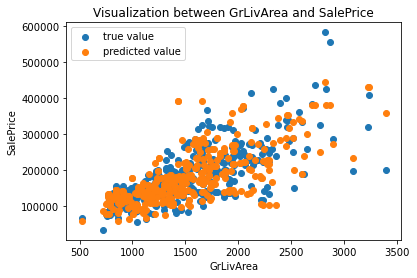

In [19]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, dtr_predict)

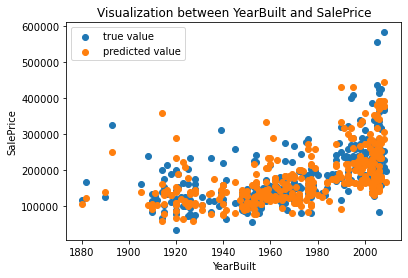

In [20]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, dtr_predict)

Random Forest Regressor

In [21]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_predict = rfr.predict(X_test)
print(mean_squared_error(y_test, rfr_predict))

1693010821.7492394


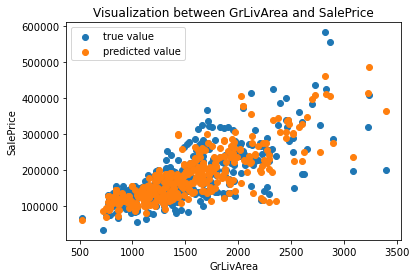

In [22]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, rfr_predict)

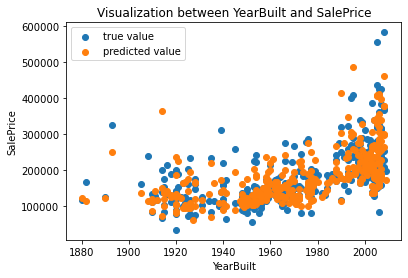

In [28]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, rfr_predict)

### [Problem 4] (Advance assignment) Learning using other features

In [27]:
# Make general function for all features and methods

def advance_feature(data='train.csv', obj_var='SalePrice', exp_var=['GrLivArea', 'YearBuilt'], method='lr'):
    """
    General function to explore data in this assignment.
    Parameters:
    -------------------
        data: DataFrame
        obj_var: Objective variable
        exp_var: List of exploring variables
        method: Method used for prediction
    """
    df = pd.read_csv(data)
    X = df[exp_var].values
    y = df[obj_var].values
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    if method == 'lr':
        linear_regression(X_train, y_train, X_test, y_test, obj_var, exp_var)
    elif method == 'svr':
        svr(X_train, y_train, X_test, y_test, obj_var, exp_var)
    elif method == 'dtr':
        dtr(X_train, y_train, X_test, y_test, obj_var, exp_var)
    elif method == 'rfr':
        rfr(X_train, y_train, X_test, y_test, obj_var, exp_var)
        
def linear_regression(X_train, y_train, X_test, y_test, obj_var, exp_var):
    reg = LinearRegression().fit(X_train, y_train)
    reg_predict = reg.predict(X_test)
    print('Mean Squared Error = ', mean_squared_error(y_test, reg_predict))
    for item in exp_var:
        plot_graph(item, obj_var, X_test[:, exp_var.index(item)], y_test, reg_predict)
    
def svr(X_train, y_train, X_test, y_test, obj_var, exp_var):
    svr = SVR()
    svr.fit(X_train, y_train)
    svr_predict = svr.predict(X_test)
    print('Mean Squared Error = ', mean_squared_error(y_test, svm_predict))
    for item in exp_var:
        plot_graph(item, obj_var, X_test[:, exp_var.index(item)], y_test, svm_predict)
        
def dtr(X_train, y_train, X_test, y_test, obj_var, exp_var):
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train, y_train)
    dtr_predict = dtr.predict(X_test)
    print('Mean Squared Error = ', mean_squared_error(y_test, dtr_predict))
    for item in exp_var:
        plot_graph(item, obj_var, X_test[:, exp_var.index(item)], y_test, dtr_predict)
        
def rfr(X_train, y_train, X_test, y_test, obj_var, exp_var):
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    rfr_predict = rfr.predict(X_test)
    print('Mean Squared Error = ', mean_squared_error(y_test, rfr_predict))
    for item in exp_var:
        plot_graph(item, obj_var, X_test[:, exp_var.index(item)], y_test, rfr_predict)

Mean Squared Error =  2837574006.140211


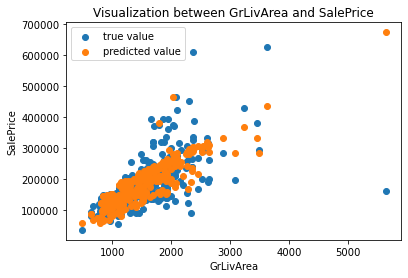

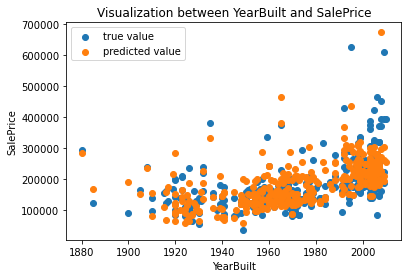

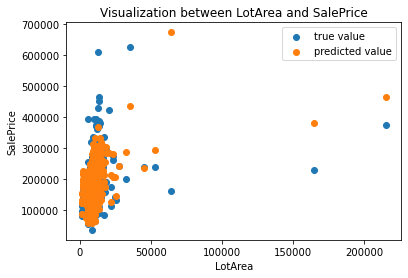

In [25]:
advance_feature(exp_var=['GrLivArea', 'YearBuilt', 'LotArea'], method='lr')

Mean Squared Error =  1104475358.2761686


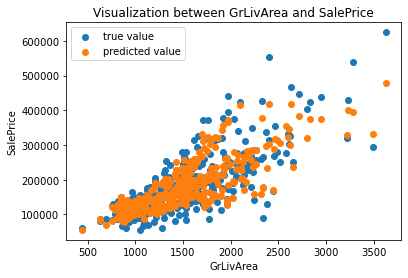

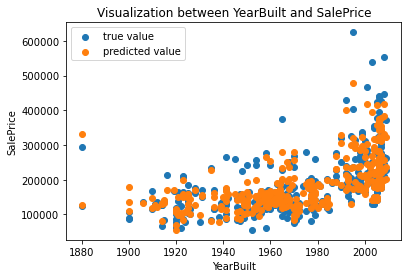

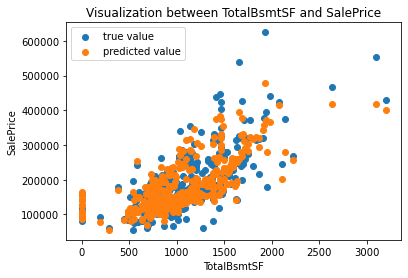

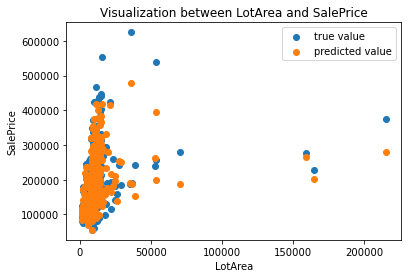

In [26]:
advance_feature(exp_var=['GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'LotArea'], method='rfr')